# <font color='blue'>SENG 474 - Assignment 1</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# This part is for preprocesssing the data
# Read data, clean it, then split

df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


# <font color='blue'> Decision Tree (DT)</font>

In [51]:
# Functions that will be used to calculate train vs test error, and to plot the result

# Calculate train and test errors
def calculate_errors(classifier, parameter, param_range):
    train_errors = list()
    test_errors = list()
    for i in param_range:
        classifier.set_params(parameter=i)
        classifier.fit(X_train, y_train)
        train_errors.append(classifier.score(X_train, y_train))
        test_errors.append(classifier.score(X_test, y_test))
    return (train_errors, test_errors)

def graph_train_test_errors(train_errors, test_errors, param_range, xlabel, ylabel, title):
    # Optimal Parameter #########################
    i_param_optim = np.argmax(test_errors)
    param_optim = param_range[i_param_optim]
    print("Optimal parameter : %s" % param_optim)
    #############################################
    lw = 2
    plt.plot(param_range, train_errors, label="Train",color="darkorange", lw=lw)
    plt.plot(param_range, test_errors, label="Test",  color="navy", lw=lw)
    plt.vlines(param_optim, plt.ylim()[0], np.max(test_errors), color='k',
               linewidth=3, label='Optimum on test')
    plt.legend(loc='lower left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.autoscale()
    plt.show()


### DT Test 1: Tuning max_leaf_nodes

This part shows the effect of allowing more leaf nodes in decision trees of two split criteria (Gini vs Entropy).

In [50]:
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'max_leaf_nodes'
param_range = np.arange(2, 30, 1)

xlabel = 'Number of ' + param.upper()
ylabel = 'Performance'
title = 'Performance Measure'

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param_range, xlabel, ylabel, title + ' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param_range, xlabel, ylabel, title + ' (Gini)')

models.clear()

ValueError: Invalid parameter parameter for estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

### DT Test 2: Tuning max_leaf_nodes with a new random_state

Similiar to the above test, the only different is setting the random_state to 1 to see how \
this will affect the performance measure.

Optimal parameter : 5


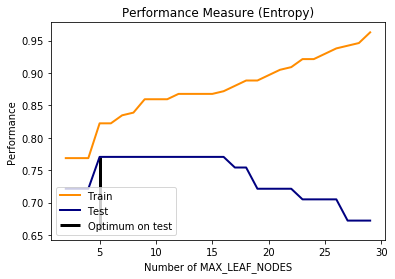

Optimal parameter : 17


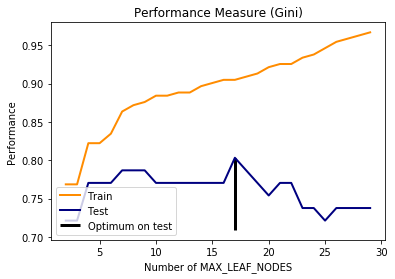

In [33]:
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
    
# Parameter to test
param = 'max_leaf_nodes'
param_range = np.arange(2,30,1)

xlabel = 'Number of ' + param.upper()
ylabel = 'Performance'
title = 'Performance Measure'

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param_range, xlabel, ylabel, title + ' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param_range, xlabel, ylabel, title + ' (Gini)')

models.clear()

## DT Test 3: Tuning ccp_alpha (cost-complexity pruning parameter)

The previous two tests were pruning the tree by adjusting the maximum leaf nodes allowed. \
This test uses Minimal cost-complexity pruning is algorithm provided by sklearn library

In [54]:
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    
# Parameter to test
param = 'ccp_alpha'
param_range = np.arange(2, 30, 1)

xlabel = 'Number of ' + param.upper()
ylabel = 'Performance'
title = 'Performance Measure'

models = {
    'entropy':calculate_errors(classifier1, param, param_range),
    'gini':calculate_errors(classifier2, param, param_range)
} 

graph_train_test_errors(models['entropy'][0], models['entropy'][1], 
                        param_range, xlabel, ylabel, title + ' (Entropy)')
graph_train_test_errors(models['gini'][0], models['gini'][1], 
                        param_range, xlabel, ylabel, title + ' (Gini)')

models.clear()

ValueError: Invalid parameter parameter for estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

## References: 
https://scikit-learn.org
\
https://matplotlib.org/tutorials/intermediate/legend_guide.html
\
\
Machine Learning A-Z by Udemy: 
\
https://www.udemy.com/course/machinelearning/
\
\
Ploting train error vs test error (by Alexandre Gramfort): \
https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html